# Description

Experiments with Deep Neural Networks. 
You are expected to use the Python language and Keras library unless otherwise noted. You will 
prepare a report including your code and results (in a Jupyter Notebook). The expected report format
is shown at the end of this document. You are encouraged to use Google Colab for computational
needs to do this work.

**Part 1: Model a deep feed forward network for regression**


Assume that you are given a polynomial with multiple inputs and multiple outputs of the form: 

(𝑦1, 𝑦2, … , 𝑦6) = 𝑃(𝑥1, 𝑥2, … , 𝑥8)

The exact polynomials are: 

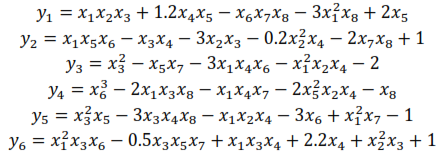


For this given set of polynomials, generate 𝑁
𝑡
 instances to train a network. Create an additional 𝑁
𝑣

instances for validation of the trained model.  
1. Choose 𝑁
𝑡
 to be 1000.
2. In your training data add some noise to 𝑦
𝑖
’s from a normal distribution with 𝜇 = 0.0 and 𝜎 =
0.001. 
3. Build a feed forward network with exactly 3 hidden layers:
* Each layer should include exactly 6 nodes in the beginning.
* Use a combination of activation functions in these layers (use the same activation for 
each node at a given layer).
4. Define your loss function: 
* Use MSE for loss function.
5. Train your algorithm with SGD. 
* Use appropriate learning rates and the number of epochs.
* Report the training and validation errors. 
6. Repeat Steps 2-4 with another set of activation functions (3 different combinations), learning
rates (3 different schemes) and number of epochs (after finding a reasonable number of
epochs in the first trial, increase by 50% for 2 times). 
7. Choose your best parameters after Step 5.
8. Add new nodes at a time to each hidden layer: 
* Start from the first hidden layer, add two nodes, train, and record results.
* Move to the second hidden layer, add two nodes, train, and record results.
* Move to the third hidden layer, add two nodes, train, and record results.
* Repeat Step 8 until bias and variance curve is drawn (see Figure 1 for a fictitious 
example from the first lecture).
9. Increase 𝑁
𝑡
 by 10% and repeat Step 8.
10. Report your all results.

# Step 1 to Step 6

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import matplotlib.pyplot as plt

In [ ]:
# Polynımial
def polynomial(x):
    y1 = (x[0]*x[1]*x[2]) + (1.2*x[3]*x[4]) - (x[5]*x[6]*x[7]) - (3*(x[0]**2)*x[7]) + (2*x[4])
    y2 = (x[0]*x[4]*x[5]) - (x[2]*x[3]) - (3*x[1]*x[2]) - (0.2*(x[1]**2)*x[3]) - (2*x[6]*x[7]) + 1
    y3 = (x[2]**2) - (x[4]*x[6]) - (3*x[0]*x[3]*x[5]) - ((x[0]**2)*x[1]*x[3]) - 2
    y4 = (x[5]**3) - (2*x[0]*x[2]*x[7]) - (x[0]*x[3]*x[6]) - (2*(x[4]**2)*x[1]*x[3]) - x[7]
    y5 = ((x[2]**2)*x[4]) - (3*x[2]*x[3]*x[7]) - (x[0]*x[1]*x[3]) - (3*x[5]) + ((x[0]**2)*x[6]) - 1
    y6 = ((x[0]**2)*x[2]*x[5]) - (0.5*x[2]*x[4]*x[6]) + (x[0]*x[2]*x[3]) + (2.2*x[3]) + ((x[1]**2)*x[2]) + 1
    return np.array([y1, y2, y3, y4, y5, y6])

In [ ]:
# generate train data
np.random.seed(0)
Nt = 1000
X_train = np.random.rand(Nt, 8)
y_train = np.apply_along_axis(polynomial, axis=1, arr=X_train) + np.random.normal(0, 0.001, (Nt, 6))

In [ ]:
# generate validation data
Nv = 350
X_val = np.random.rand(Nv, 8)
y_val = np.apply_along_axis(polynomial, axis=1, arr=X_val) + np.random.normal(0, 0.001, (Nv, 6))

In [ ]:
# model
def build_model(act_fn, lr):
    optimizer = SGD(learning_rate=lr)
    model = Sequential()
    model.add(Dense(6, activation=act_fn, input_shape=(8,)))
    model.add(Dense(6, activation=act_fn))
    model.add(Dense(6, activation=act_fn))
    model.add(Dense(6))
    model.compile(optimizer=optimizer, loss='mse')
    return model

# define activation functions to try
act_fns = ['relu', 'tanh', 'sigmoid']

# define learning rates to try
learning_rates = [0.05, 0.1, 0.2]

epochs = [100, 150, 225]

models = []
train_losses = []
val_losses = []
for act_fn in act_fns:
    for lr in learning_rates:
      for epoch in epochs:
        print(f'Model with {act_fn} activation, {epoch} epoch and {lr} learning rate')
        model = build_model(act_fn, lr)
        history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epoch)
        models.append(f'Model with {act_fn} activation, {epoch} epoch and {lr} learning rate')
        train_losses.append(history.history['loss'][-1])
        val_losses.append(history.history['val_loss'][-1])

for i in range(len(models)):
  print(f'{models[i]} :   Train loss:{train_losses[i]}   Test loss:{val_losses[i]}')

Streaming output truncated to the last 5000 lines.
Epoch 122/225
32/32 [==============================] - 0s 4ms/step - loss: 0.1172 - val_loss: 0.1272
Epoch 123/225
32/32 [==============================] - 0s 4ms/step - loss: 0.1170 - val_loss: 0.1247
Epoch 124/225
32/32 [==============================] - 0s 3ms/step - loss: 0.1132 - val_loss: 0.1475
Epoch 125/225
32/32 [==============================] - 0s 4ms/step - loss: 0.1149 - val_loss: 0.1261
Epoch 126/225
32/32 [==============================] - 0s 3ms/step - loss: 0.1162 - val_loss: 0.1236
Epoch 127/225
32/32 [==============================] - 0s 4ms/step - loss: 0.1142 - val_loss: 0.1251
Epoch 128/225
32/32 [==============================] - 0s 3ms/step - loss: 0.1133 - val_loss: 0.1322
Epoch 129/225
32/32 [==============================] - 0s 4ms/step - loss: 0.1138 - val_loss: 0.1232
Epoch 130/225
32/32 [==============================] - 0s 3ms/step - loss: 0.1123 - val_loss: 0.1270
Epoch 131/225
32/32 [===================

* Model with relu activation, 100 epoch and 0.05 learning rate :   Train loss:0.48884883522987366   Test loss:0.511837363243103
* Model with relu activation, 150 epoch and 0.05 learning rate :   Train loss:0.18912722170352936   Test loss:0.20300935208797455
* Model with relu activation, 225 epoch and 0.05 learning rate :   Train loss:0.33096280694007874   Test loss:0.34861767292022705
* Model with relu activation, 100 epoch and 0.1 learning rate :   Train loss:0.33674806356430054   Test loss:0.35159993171691895
* Model with relu activation, 150 epoch and 0.1 learning rate :   Train loss:0.3286438584327698   Test loss:0.34187689423561096
* Model with relu activation, 225 epoch and 0.1 learning rate :   Train loss:0.1117573231458664   Test loss:0.14539703726768494
* Model with relu activation, 100 epoch and 0.2 learning rate :   Train loss:0.2352292835712433   Test loss:0.2231810986995697
* Model with relu activation, 150 epoch and 0.2 learning rate :   Train loss:0.12153374403715134   Test loss:0.13268549740314484
* Model with relu activation, 225 epoch and 0.2 learning rate :   Train loss:0.20262324810028076   Test loss:0.2555912137031555
* Model with tanh activation, 100 epoch and 0.05 learning rate :   Train loss:0.11194945871829987   Test loss:0.12952661514282227
* Model with tanh activation, 150 epoch and 0.05 learning rate :   Train loss:0.08351477980613708   Test loss:0.09571139514446259
* Model with tanh activation, 225 epoch and 0.05 learning rate :   Train loss:0.07554465532302856   Test loss:0.0923641100525856
* Model with tanh activation, 100 epoch and 0.1 learning rate :   Train loss:0.07094822824001312   Test loss:0.0941736027598381
* Model with tanh activation, 150 epoch and 0.1 learning rate :   Train loss:0.06935729831457138   Test loss:0.10758184641599655
* Model with tanh activation, 225 epoch and 0.1 learning rate :   Train loss:0.06857974827289581   Test loss:0.08959276229143143
* Model with tanh activation, 100 epoch and 0.2 learning rate :   Train loss:0.07511471956968307   Test loss:0.08647814393043518
* Model with tanh activation, 150 epoch and 0.2 learning rate :   Train loss:0.07555132359266281   Test loss:0.07267632335424423
* Model with tanh activation, 225 epoch and 0.2 learning rate :   Train loss:0.07274805009365082   Test loss:0.10899711400270462
* Model with sigmoid activation, 100 epoch and 0.05 learning rate :   Train loss:0.6932366490364075   Test loss:0.7327443957328796
* Model with sigmoid activation, 150 epoch and 0.05 learning rate :   Train loss:0.6927635073661804   Test loss:0.7300496101379395
* Model with sigmoid activation, 225 epoch and 0.05 learning rate :   Train loss:0.6703101992607117   Test loss:0.7091380953788757
* Model with sigmoid activation, 100 epoch and 0.1 learning rate :   Train loss:0.6708856225013733   Test loss:0.7083842754364014
* Model with sigmoid activation, 150 epoch and 0.1 learning rate :   Train loss:0.552801251411438   Test loss:0.5860773324966431
* Model with sigmoid activation, 225 epoch and 0.1 learning rate :   Train loss:0.348183274269104   Test loss:0.36276501417160034
* Model with sigmoid activation, 100 epoch and 0.2 learning rate :   Train loss:0.472082257270813   Test loss:0.49199333786964417
* Model with sigmoid activation, 150 epoch and 0.2 learning rate :   Train loss:0.349443644285202   Test loss:0.36390137672424316
* Model with sigmoid activation, 225 epoch and 0.2 learning rate :   Train loss:0.3315470814704895   Test loss:0.356063574552536

# Step 7 - Chosing best parameters

* Model with tanh activation, 
* 225 epoch
* 0.1 learning rate
* Train loss:0.06857974827289581        
* Test loss:0.08959276229143143

# Step 8
Add new nodes at a time to each hidden layer:
* Start from the first hidden layer, add two nodes, train,and record results.
* Move to the second hidden layer, add two nodes, train,and record results.
* Move to the third hidden layer, add two nodes, train,and record results.
* Repeat  Step  8 until bias  and  variance curve  is drawn(see Figure 1for  a fictitiousexample from the first lecture).

In [ ]:
# Model
def build_model(first_node=6, second_node=6, third_node=6):
    optimizer = SGD(learning_rate=0.1)
    model = Sequential()
    model.add(Dense(first_node, activation='tanh', input_shape=(8,)))
    model.add(Dense(second_node, activation='tanh'))
    model.add(Dense(third_node, activation='tanh'))
    model.add(Dense(6))
    model.compile(optimizer=optimizer, loss='mse')
    return model

* Model with tanh activation, 
* 225 epoch
* 0.1 learning rate
* Train loss:0.06857974827289581        
* Test loss:0.08959276229143143

* Model with tanh activation, 
* 225 epoch
* 0.1 learning rate
* Train loss:0.06857974827289581        
* Test loss:0.08959276229143143

Training model with 6 nodes in first hidden layer, 6 nodes in second hidden layer, 6 nodes in third hidden layer
Training model with 8 nodes in first hidden layer, 8 nodes in second hidden layer, 8 nodes in third hidden layer
Training model with 10 nodes in first hidden layer, 10 nodes in second hidden layer, 10 nodes in third hidden layer
Training model with 12 nodes in first hidden layer, 12 nodes in second hidden layer, 12 nodes in third hidden layer
Training model with 14 nodes in first hidden layer, 14 nodes in second hidden layer, 14 nodes in third hidden layer
Training model with 16 nodes in first hidden layer, 16 nodes in second hidden layer, 16 nodes in third hidden layer
Training model with 18 nodes in first hidden layer, 18 nodes in second hidden layer, 18 nodes in third hidden layer
Training model with 20 nodes in first hidden layer, 20 nodes in second hidden layer, 20 nodes in third hidden layer
Training model with 22 nodes in first hidden layer, 22 nodes in second hidden 

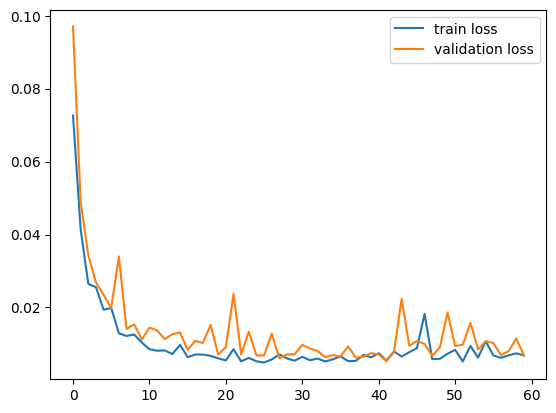

In [ ]:
train_losses = []
val_losses = []
first_node = 6
second_node = 6
third_node = 6

for i in range(0, 120, 2):
    print(f'Training model with {first_node+i} nodes in first hidden layer, {second_node+i} nodes in second hidden layer, {third_node+i} nodes in third hidden layer')
    model = build_model(first_node+i, second_node+i, third_node+i)
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=225, verbose=0)
    train_losses.append(history.history['loss'][-1])
    val_losses.append(history.history['val_loss'][-1])

# Plot bias and variance curve
plt.plot(train_losses, label='train loss')
plt.plot(val_losses, label='validation loss')
plt.legend()
plt.show()
